In [83]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import ipywidgets as widgets

In [78]:
reg1 = pd.read_csv('regression_1.csv')
reg2 = pd.read_csv('regression_2.csv')
class1 = pd.read_csv('classification.csv')

##### Plotting

In [80]:

@interact(deg=(2, 10, 1))
def plot_linear_line(deg):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_features = poly.fit_transform(np.array(reg1['x1']).reshape(-1, 1))
    reg_model1 =LinearRegression()
    reg_model1.fit(poly_features, reg1['x2'])
    y_predicted = reg_model1.predict(poly_features)
    sns.scatterplot(data=reg1, x='x1', y='x2', s=100, c='#785EF0')
    plt.plot(reg1['x1'], y_predicted, c='#FE6100', linewidth=3)
    plt.show()
    rmse = mean_squared_error(reg1['x2'], y_predicted, squared=False)
    print(rmse)

interactive(children=(IntSlider(value=6, description='deg', max=10, min=2), Output()), _dom_classes=('widget-i…

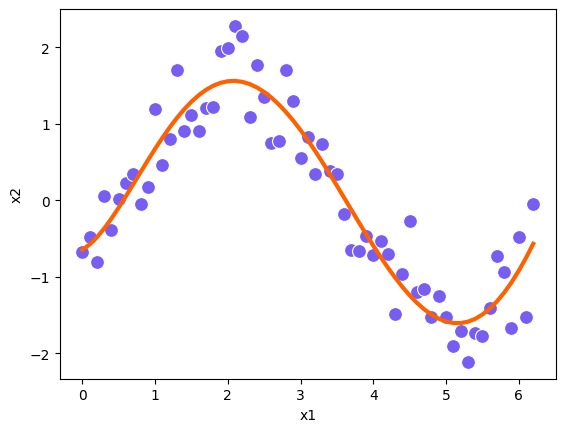

0.3783071163674037
[ 0.53828356  1.53973845 -0.90676291  0.15547246 -0.00830357]
-0.6454903233880732


In [116]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(np.array(reg1['x1']).reshape(-1, 1))
reg_model1 =LinearRegression()
reg_model1.fit(poly_features, reg1['x2'])
y_predicted = reg_model1.predict(poly_features)
sns.scatterplot(data=reg1, x='x1', y='x2', s=100, c='#785EF0')
plt.plot(reg1['x1'], y_predicted, c='#FE6100', linewidth=3)
plt.show()
rmse = mean_squared_error(reg1['x2'], y_predicted, squared=False)
print(rmse)
print(reg_model1.coef_)
print(reg_model1.intercept_)

In [81]:
@interact(deg=(2, 10, 1))
def plot_linear_line(deg):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_features = poly.fit_transform(np.array(reg2['x1']).reshape(-1, 1))
    reg_model1 =LinearRegression()
    reg_model1.fit(poly_features, reg2['x2'])
    y_predicted = reg_model1.predict(poly_features)
    sns.scatterplot(data=reg2, x='x1', y='x2', s=100, c='#785EF0')
    plt.plot(reg2['x1'], y_predicted, c='#FE6100', linewidth=3)
    plt.show()
    rmse = mean_squared_error(reg2['x2'], y_predicted, squared=False)
    print(rmse)

interactive(children=(IntSlider(value=6, description='deg', max=10, min=2), Output()), _dom_classes=('widget-i…

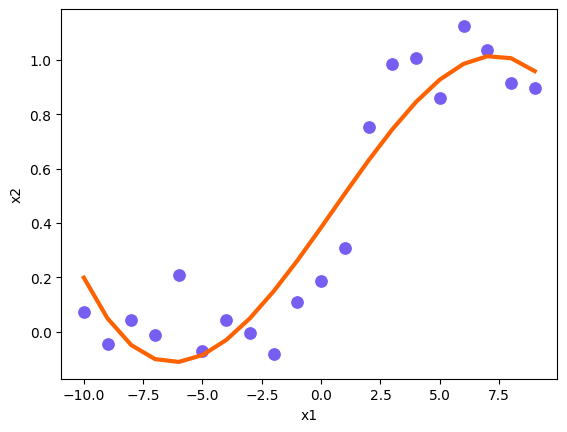

0.14915412347787818
[ 0.12407203  0.00148245 -0.00090745]
0.3834188601076447


In [118]:

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(np.array(reg2['x1']).reshape(-1, 1))
reg_model2 =LinearRegression()
reg_model2.fit(poly_features, reg2['x2'])
y_predicted = reg_model2.predict(poly_features)
sns.scatterplot(data=reg2, x='x1', y='x2', s=100, c='#785EF0')
plt.plot(reg2['x1'], y_predicted, c='#FE6100', linewidth=3)
plt.show()
rmse = mean_squared_error(reg2['x2'], y_predicted, squared=False)
print(rmse)
print(reg_model2.coef_)
print(reg_model2.intercept_)

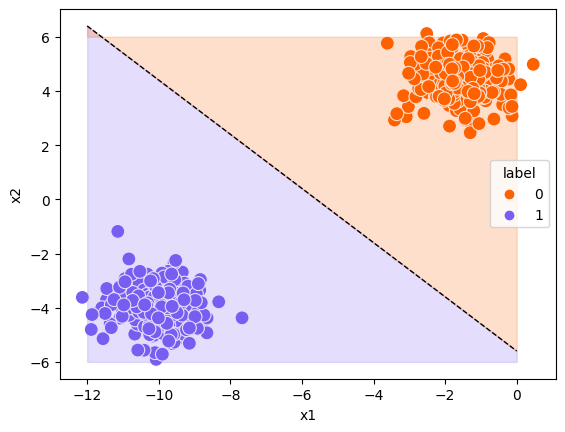

In [112]:
logisticRegr = LogisticRegression()
logisticRegr.fit(np.array(class1[['x1', 'x2']]), class1.label)
b = logisticRegr.intercept_[0]
w1, w2 = logisticRegr.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
ymin, ymax = -6, 6
xmin, xmax = -12, 0
xd = np.array([xmin, xmax])
yd = m*xd + c
sns.scatterplot(data=class1, x='x1', y='x2',hue='label',
                s=100, palette=["#FE6100", "#785EF0"])
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='#785EF0', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='#FE6100', alpha=0.2)
plt.show()

In [120]:
c

array([-5.59614855])